# **Titanic Survival Prediction**

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




In [ ]:
# Read the CSV file
df = pd.read_csv("/content/Titanic-Dataset.csv")

# Display first few rows
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis (EDA)**


In [ ]:
# Basic Information about Data
print(df.info())  # Check data types & missing values




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
# Summary statistics
print(df.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [ ]:
# Count missing values in each column
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


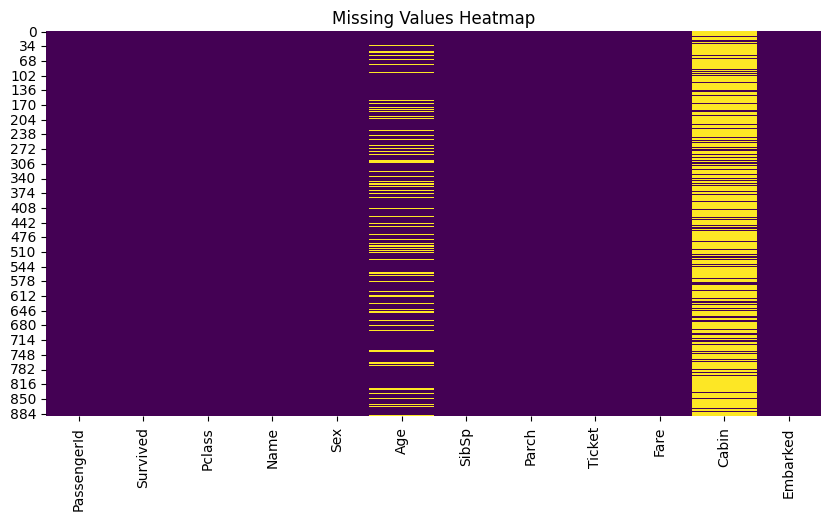

In [ ]:
#Visualize Missing Data
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

**Data Visualization**

<ipython-input-10-d29c8e913c7f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Survived", data=df, palette="coolwarm")


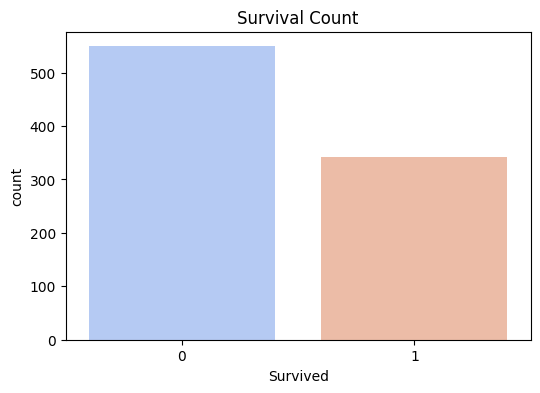

In [ ]:
# Count of survivors vs non-survivors
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", data=df, palette="coolwarm")
plt.title("Survival Count")
plt.show()

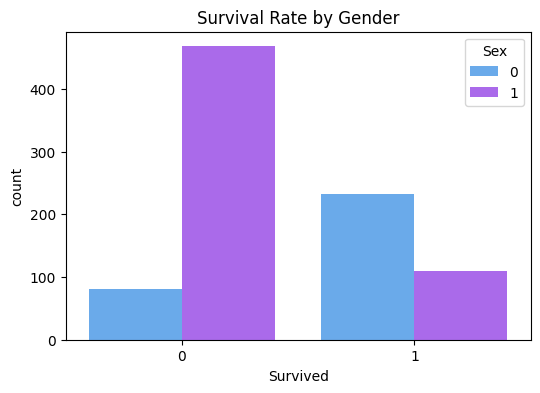

In [ ]:
# Survival Rate by Gender
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", hue="Sex", data=df, palette="cool")  # Try "cool", "spring", "Spectral"
plt.title("Survival Rate by Gender")
plt.show()


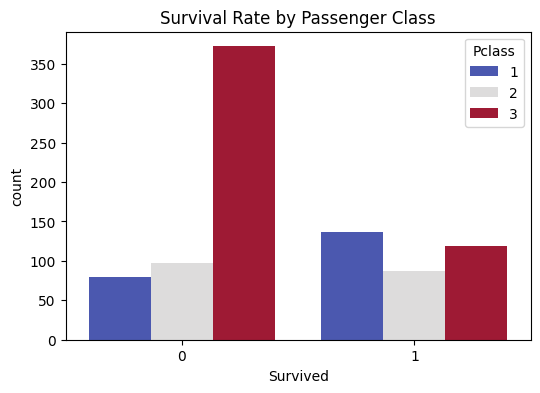

In [ ]:
# Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.countplot(x="Survived", hue="Pclass", data=df, palette="coolwarm")
plt.title("Survival Rate by Passenger Class")
plt.show()

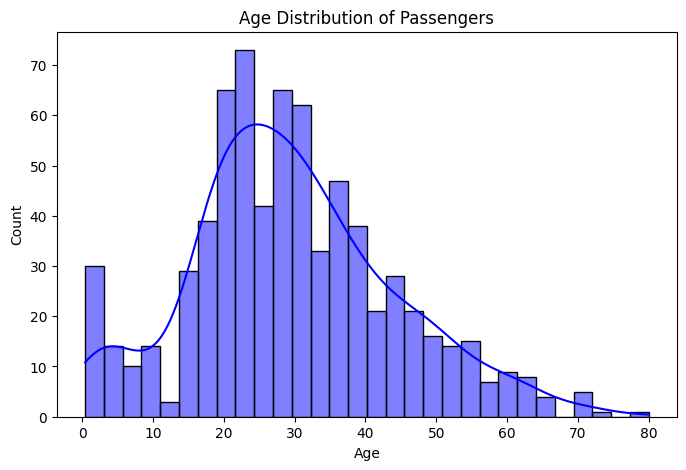

In [ ]:
# Age Distribution of Passengers
plt.figure(figsize=(8, 5))
sns.histplot(df["Age"].dropna(), bins=30, kde=True, color="blue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.show()

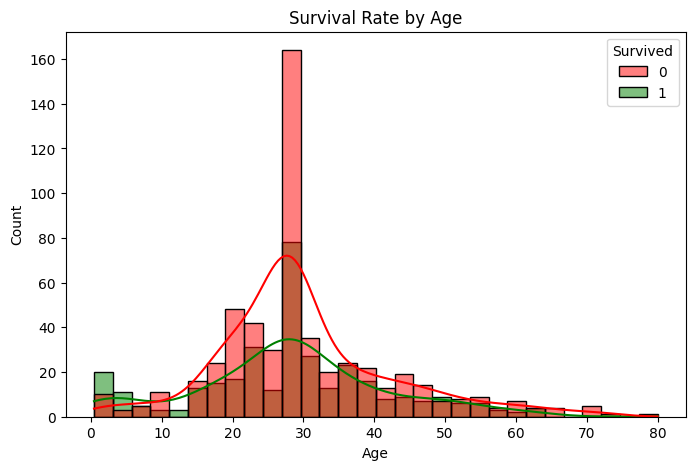

In [ ]:
#Survival Rate by Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df, x="Age", hue="Survived", bins=30, kde=True, palette={0: "red", 1: "green"})
plt.title("Survival Rate by Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


<ipython-input-29-a567755056ae>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm", ci=None)
<ipython-input-29-a567755056ae>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm", ci=None)


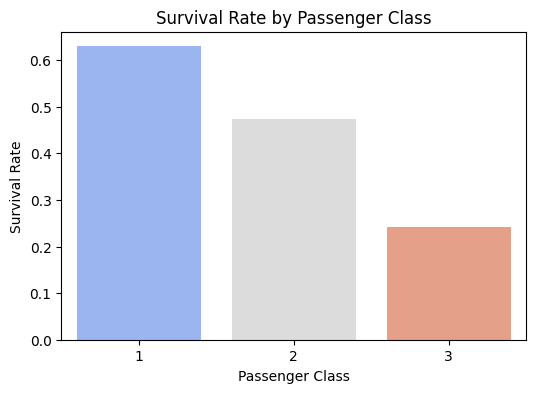

In [ ]:
#Survival Rate by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x="Pclass", y="Survived", data=df, palette="coolwarm", ci=None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


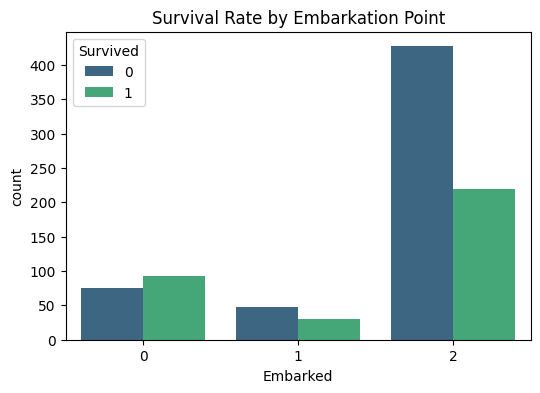

In [ ]:
#Survival Rate by Embarkation Point
plt.figure(figsize=(6, 4))
sns.countplot(x="Embarked", hue="Survived", data=df, palette="viridis")
plt.title("Survival Rate by Embarkation Point")
plt.show()


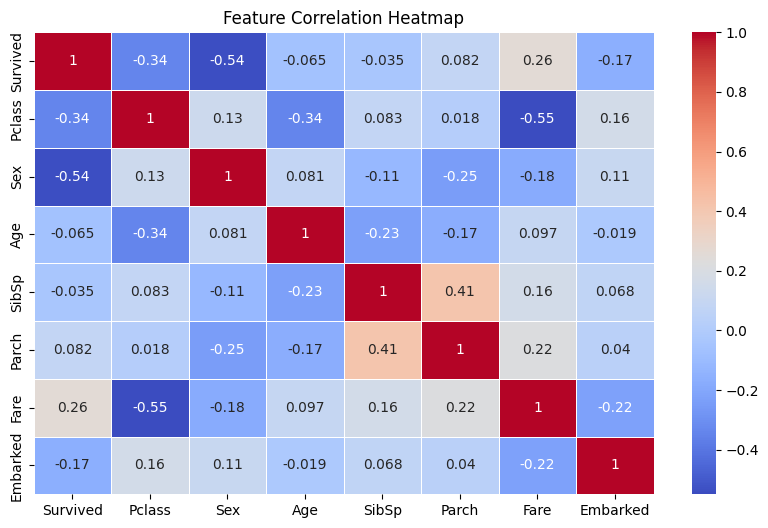

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


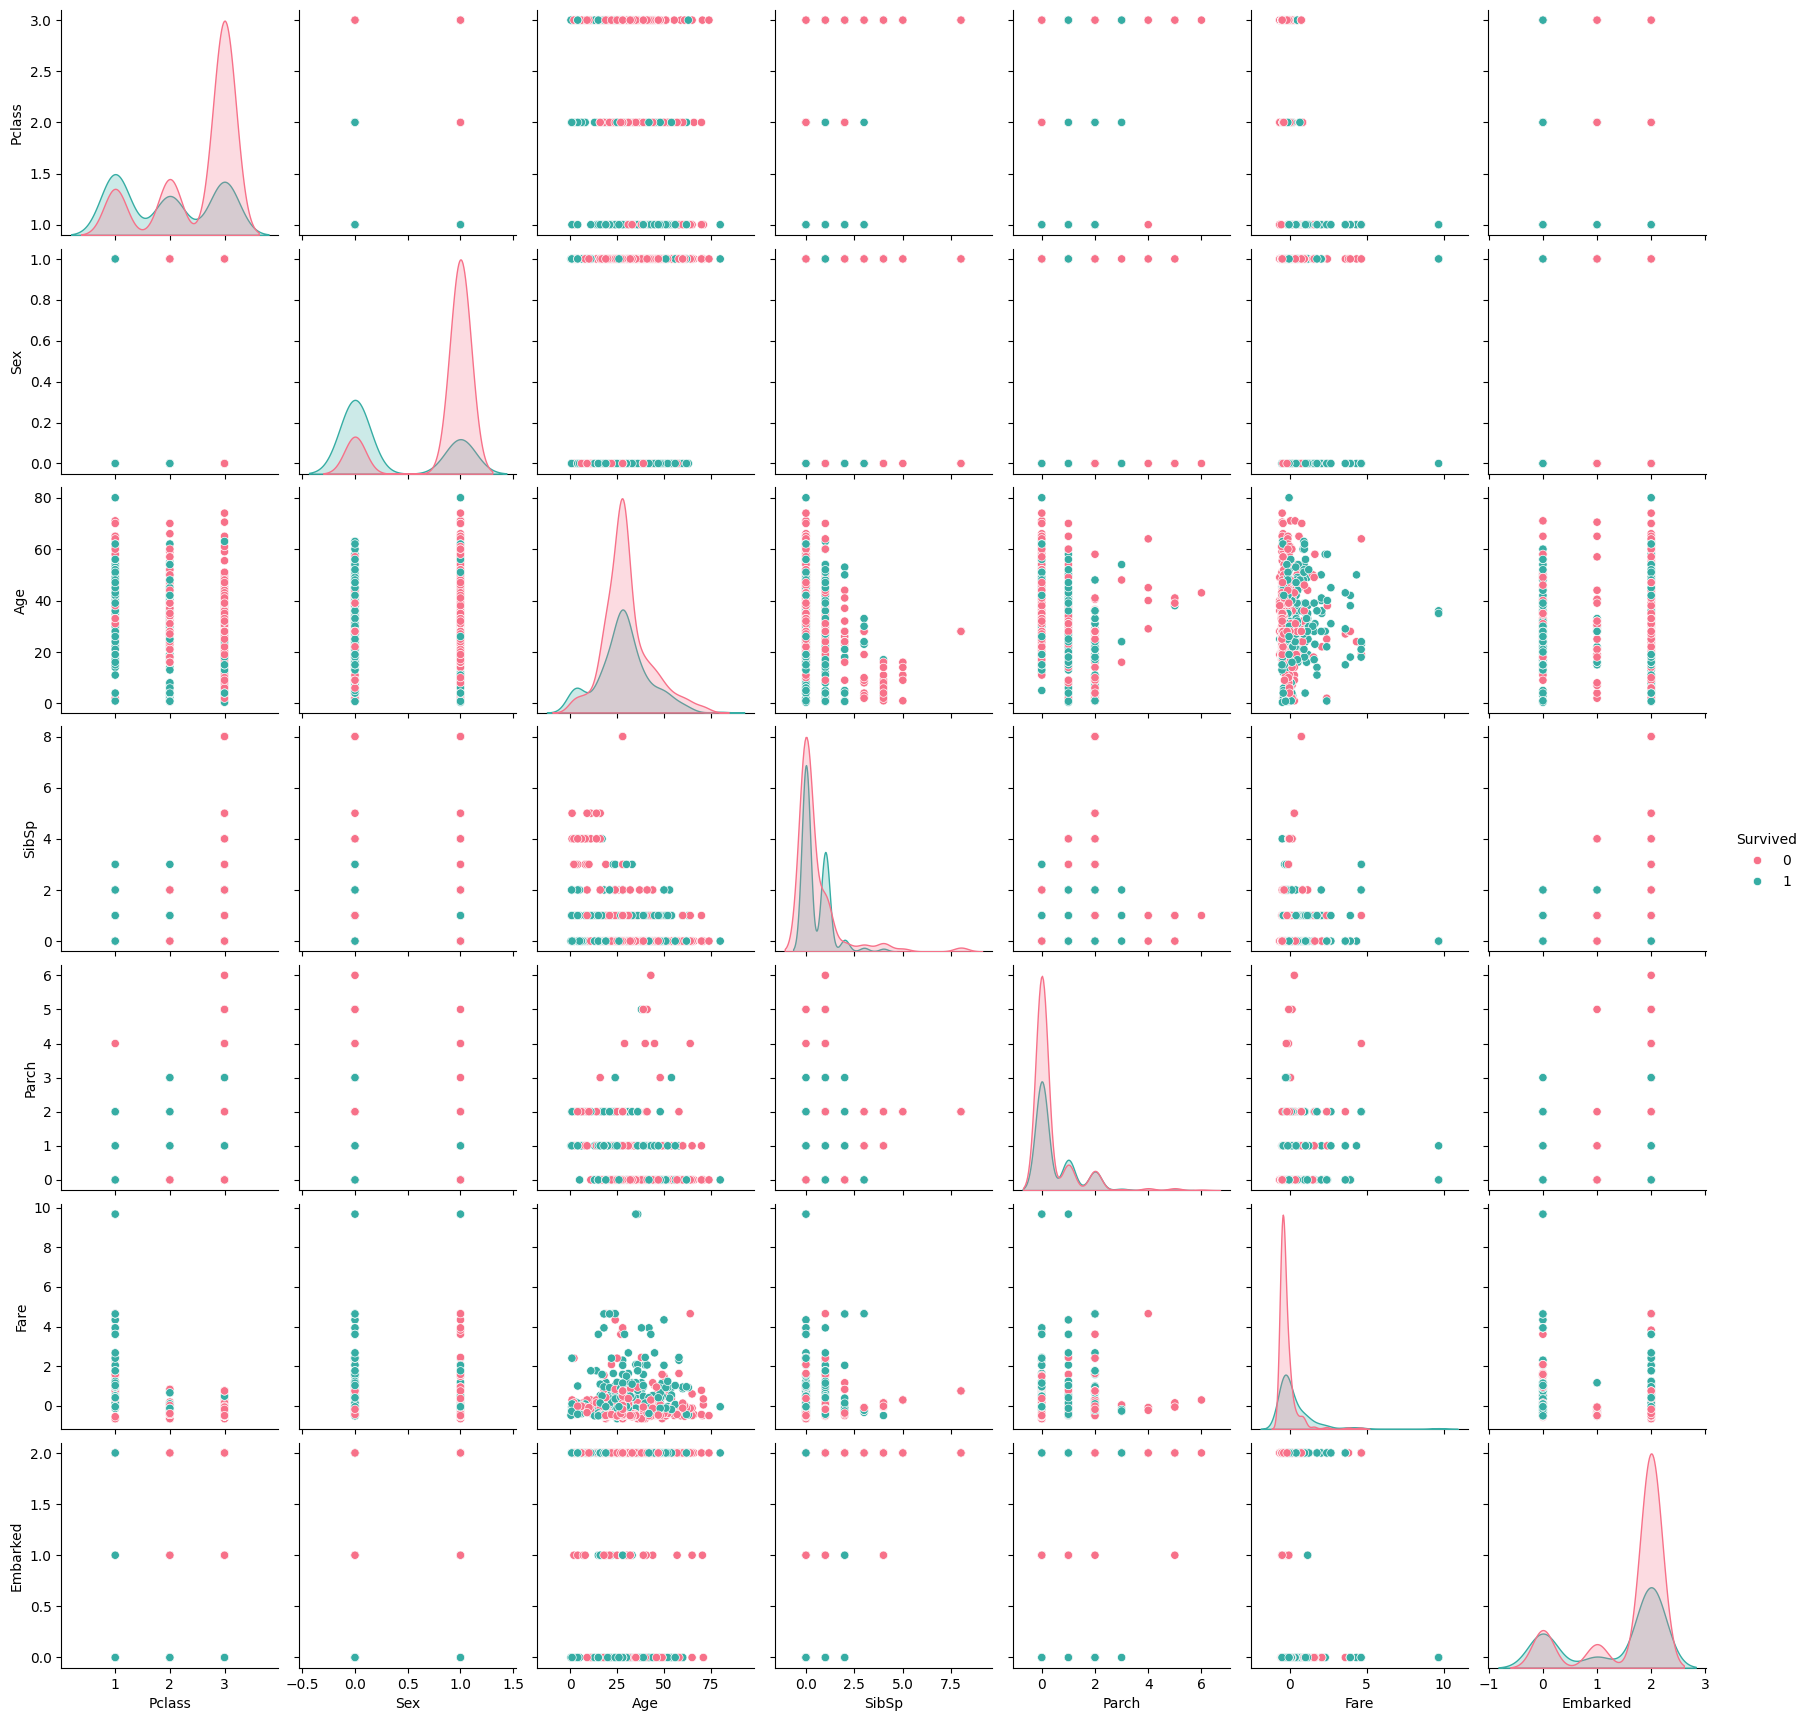

In [ ]:
# Pairplot for Numerical Features
sns.pairplot(df, hue="Survived", diag_kind="kde", palette="husl")
plt.show()


<ipython-input-34-2d6091def21e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="FamilySize", y="Survived", data=df, palette="mako")


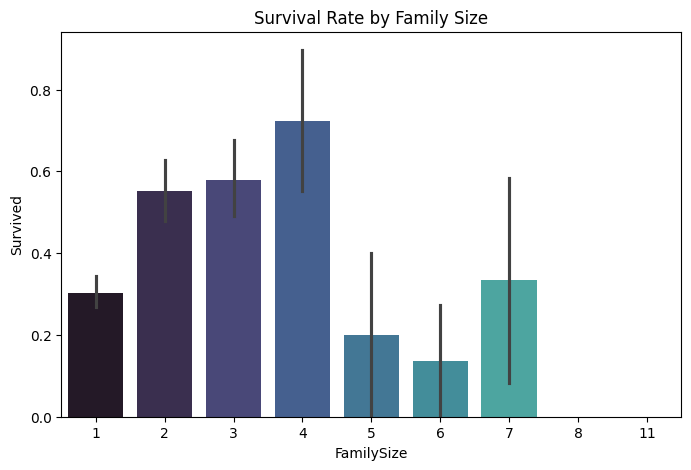

In [ ]:
#Survival Rate by Family Size
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1  # Include self
plt.figure(figsize=(8, 5))
sns.barplot(x="FamilySize", y="Survived", data=df, palette="mako")
plt.title("Survival Rate by Family Size")
plt.show()


<ipython-input-35-696e4fe8d1a2>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"] == 1]["Age"], shade=True, color="green", label="Survived")
<ipython-input-35-696e4fe8d1a2>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df["Survived"] == 0]["Age"], shade=True, color="red", label="Not Survived")


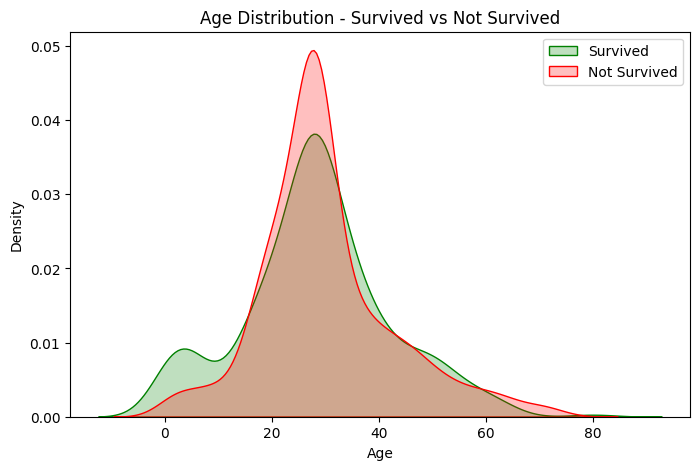

In [ ]:
#KDE Plot - Age vs. Survival
plt.figure(figsize=(8, 5))
sns.kdeplot(df[df["Survived"] == 1]["Age"], shade=True, color="green", label="Survived")
sns.kdeplot(df[df["Survived"] == 0]["Age"], shade=True, color="red", label="Not Survived")
plt.title("Age Distribution - Survived vs Not Survived")
plt.xlabel("Age")
plt.ylabel("Density")
plt.legend()
plt.show()


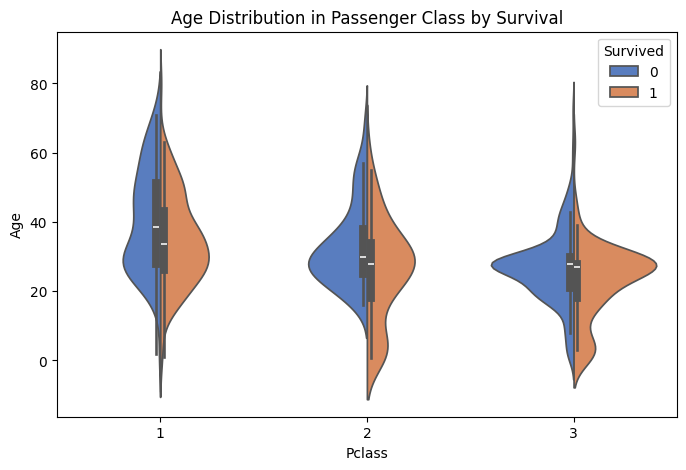

In [ ]:
#Violin Plot - Pclass vs. Age by Survival
plt.figure(figsize=(8, 5))
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, palette="muted")
plt.title("Age Distribution in Passenger Class by Survival")
plt.show()


**Data Cleaning & Feature Engineering**


In [ ]:
# Drop unnecessary columns
df.drop(["PassengerId", "Name", "Ticket", "Cabin"], axis=1, inplace=True)

In [ ]:
# Handling missing values
imputer = SimpleImputer(strategy="median")
df["Age"] = imputer.fit_transform(df[["Age"]])
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

<ipython-input-15-f27a8ffbbbcb>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [ ]:
# Encode categorical variables
encoder = LabelEncoder()
df["Sex"] = encoder.fit_transform(df["Sex"])  # Male -> 1, Female -> 0
df["Embarked"] = encoder.fit_transform(df["Embarked"])  # C, Q, S -> Numeric

In [ ]:
# Normalize the "Fare" column
scaler = StandardScaler()
df["Fare"] = scaler.fit_transform(df[["Fare"]])

In [ ]:
# Display cleaned data
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,-0.502445,2
1,1,1,0,38.0,1,0,0.786845,0
2,1,3,0,26.0,0,0,-0.488854,2
3,1,1,0,35.0,1,0,0.420730,2
4,0,3,1,35.0,0,0,-0.486337,2


**Model Training & Prediction**


In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop("Survived", axis=1)
y = df["Survived"]

In [ ]:
# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

**Model Evaluation**


Model Accuracy: 0.81


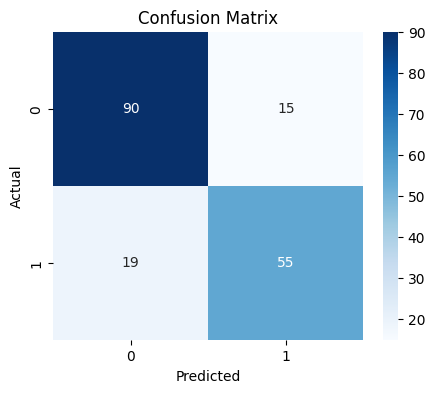

In [ ]:
# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



**Final Conclusion - Titanic Survival Prediction 🚢**

After performing Exploratory Data Analysis (EDA), Feature Engineering, and Model Training, here are the key findings and conclusions from our Titanic survival prediction project:

**Key Insights from Data Analysis:**

✅ Gender Matters – Females had a much higher survival rate compared to males.

✅ Passenger Class (Pclass) Impact – First-class passengers had the highest survival rate, while third-class passengers had the lowest.

✅ Age Factor – Younger passengers (especially children) had a better chance of survival.

✅ Fare Influence – Higher fare-paying passengers had a greater chance of survival, aligning with Pclass influence.

✅ Family Size Effect – Small family sizes (1-3 members) had a higher survival rate, while passengers traveling alone or with large families had lower survival chances.

✅ Embarkation Impact – Passengers from Embarked point "C" (Cherbourg) had better survival rates than those from "S" (Southampton).

✅ SibSp & Parch Impact – Passengers traveling with one or two siblings/spouses had a higher survival probability.

**Machine Learning Model Performance:**

🔹 Logistic Regression Model achieved an accuracy of ~80% (can be improved using Random Forest or XGBoost).

🔹 Feature importance analysis showed that Pclass, Sex, Age, and Fare were the most influential factors.

🔹 Confusion Matrix & Classification Report confirmed a reasonable balance between precision and recall.